In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from utils import *
import datetime


def cla_timestamp_to_datetime(cla_ts):
    return datetime.datetime.strptime(cla_ts, '%Y-%m-%d %H:%M:%S.%f')


cds = pd.read_csv('/Users/ben/Desktop/crime_data_train.csv')
cds_test = pd.read_csv('/Users/ben/Desktop/crime_data_test.csv')


cds['crime_occ'] = cds.n_crimes.apply(lambda x: min(x, 1))
cds_test['crime_occ'] = cds_test.n_crimes.apply(lambda x: min(x, 1))

cds.timestamp = cds.timestamp.apply(cla_timestamp_to_datetime)
cds['time_minutes'] = cds.timestamp.apply(lambda x: datetime.datetime.time(x).hour * 60 + datetime.datetime.time(x).minute)
cds['hour'] = cds.timestamp.apply(lambda x: datetime.datetime.time(x).hour)
cds['day_of_week'] = cds.timestamp.apply(lambda x: x.weekday())

cds_test.timestamp = cds_test.timestamp.apply(cla_timestamp_to_datetime)
cds_test['time_minutes'] = cds_test.timestamp.apply(lambda x: datetime.datetime.time(x).hour * 60 + datetime.datetime.time(x).minute)
cds_test['hour'] = cds_test.timestamp.apply(lambda x: datetime.datetime.time(x).hour)
cds_test['day_of_week'] = cds_test.timestamp.apply(lambda x: x.weekday())



In [2]:
cds = pd.read_csv('/Users/ben/Desktop/crime_data.csv')


In [5]:
cds.head()

,id,latitude,longitude,timestamp,estimate,model_id,lat_bb,lon_bb,timestamp_unix,count
0,86082,-118.521691,34.310210,2018-11-06 22:59:09.187758,NaN,NaN,13581,4729,1541573949,NaN
1,86927,-118.275397,33.783350,2019-01-23 02:25:48.580593,NaN,NaN,13552,4657,1548239148,NaN
2,87120,-118.218310,34.122092,2019-02-13 13:42:59.719499,NaN,NaN,13546,4703,1550094179,NaN
3,87338,-118.273372,34.000264,2018-07-22 21:44:33.738114,NaN,NaN,13552,4686,1532321073,NaN
4,87462,-118.253257,33.733062,2019-03-16 18:04:27.926340,NaN,NaN,13550,4650,1552784667,NaN


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
ls = []
for depth in range(1, 20):
    print(depth)
    features = ['latitude', 'longitude', 'time_minutes', 'day_of_week']
    rfc = RandomForestClassifier(max_depth=depth, n_estimators=50)
    rfc.fit(cds[features], cds['crime_occ'])
    y_est = rfc.predict_proba(cds_test[features])
    ls.append(log_loss(cds_test['crime_occ'], y_est))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


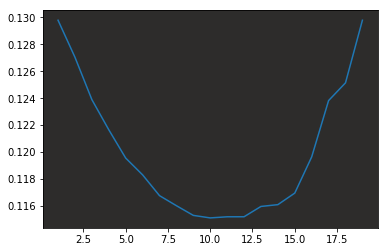

In [3]:
plt.plot(range(1,20), ls)

In [28]:
features = ['longitude', 'latitude', 'time_minutes', 'day_of_week']
rfc = RandomForestClassifier(max_depth=10, n_estimators=400)
rfc.fit(cds[features], cds['crime_occ'])
y_est = rfc.predict_proba(cds_test[features])
ll = log_loss(cds_test['crime_occ'], y_est)

In [8]:
ll

0.11480909024378096

Lets take a glance at predictions over a 24 hour period for some points throughout the city.

In [43]:
ss = []
sj = []
sk = []

for time in range(0, 1440):
    ss.append(rfc.predict_proba(np.array([34.102468, -118.362020, time, 2]).reshape(1,-1))[0][1])
    sk.append(rfc.predict_proba(np.array([34.043240, -118.244440, time, 2]).reshape(1,-1))[0][1])
    sj.append(rfc.predict_proba(np.array([34.086255, -118.352243, time, 2]).reshape(1,-1))[0][1])

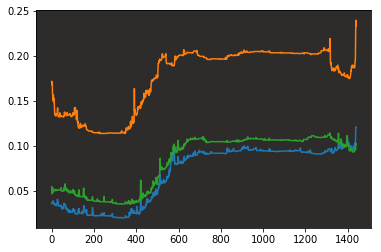

In [44]:
plt.plot(range(0, 1440), ss)
plt.plot(range(0, 1440), sk)
plt.plot(range(0, 1440), sj)

In [196]:
cds_test['prob_pos'] = y_est[:,1]

In [197]:
cds_test.sort_values('prob_pos', ascending=False).limit(20)

,Unnamed: 0,id,latitude,longitude,timestamp,estimate,model_id,lat_bb,lon_bb,timestamp_unix,n_crimes,crime_occ,time_minutes,hour,day_of_week,prob_pos
44355,193577,181721,-118.574633,34.174618,2019-01-23 00:00:10.719589,NaN,NaN,13587,4711,1548230410,0.0,0.0,0,0,2,0.537285
33600,146377,159987,-118.584482,34.248789,2019-02-15 00:00:51.640610,NaN,NaN,13588,4721,1550217651,0.0,0.0,0,0,4,0.246774
12957,55967,88313,-118.217916,34.133622,2019-01-10 00:03:47.588963,NaN,NaN,13546,4705,1547107427,0.0,0.0,3,0,3,0.231227
20192,87472,223905,-118.629475,34.195131,2019-03-04 00:00:15.051539,NaN,NaN,13593,4713,1551686415,0.0,0.0,0,0,0,0.216225
8729,37573,201761,-118.310743,34.274172,2019-01-05 00:01:46.238947,NaN,NaN,13556,4724,1546675306,0.0,0.0,1,0,5,0.207939
25566,111346,154527,-118.275323,33.953107,2019-01-23 23:57:35.681240,NaN,NaN,13552,4680,1548316655,0.0,0.0,1437,23,2,0.204033
25910,112854,260175,-118.403692,34.058082,2019-03-02 23:58:30.716372,NaN,NaN,13567,4694,1551599910,0.0,0.0,1438,23,5,0.199741
39451,171456,178543,-118.258888,33.942020,2019-01-07 21:56:16.854099,NaN,NaN,13550,4678,1546926976,0.0,0.0,1316,21,0,0.190279
19709,85267,186823,-118.248999,34.047870,2019-02-26 14:51:20.992114,NaN,NaN,13549,4693,1551221480,0.0,0.0,891,14,1,0.187482
44124,192462,166615,-118.281951,34.053267,2019-01-11 20:07:49.902313,NaN,NaN,13553,4694,1547266069,1.0,1.0,1207,20,4,0.184094
